In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import patsy # R style formula
%matplotlib inline

In [14]:
df = pd.read_csv('C:\Users\Yeoni\Desktop\homocide_report\Homicide_Reports_1980-2014.csv')

df.tail()

,Record_ID,Agency_Name,Agency_Type,City,State,Year,Month,Incident,Crime_Type,Crime_Solved,...,Victim_Ethnicity,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Victim_Count,Perpetrator_Count,Record_Source
638449,638450,Park_County,4,Park,51,2014,1,1,1,0,...,1,3,0,5,3,28,9,0,0,1
638450,638451,Sheridan_County,4,Sheridan,51,2014,6,1,1,1,...,3,1,57,4,3,1,9,0,0,1
638451,638452,Sheridan,2,Sheridan,51,2014,9,1,1,1,...,3,2,22,1,3,7,15,0,0,1
638452,638453,Sublette_County,4,Sublette,51,2014,12,1,1,1,...,2,1,31,4,2,26,10,0,1,1
638453,638454,Rock_Springs,2,Sweetwater,51,2014,9,1,1,1,...,2,2,24,4,2,7,1,0,1,1


In [5]:
A2 = np.unique(df['Agency_Type'])
A2

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [9]:
df.dtypes

Record_ID                 int64
Agency_Name              object
Agency_Type               int64
City                     object
State                     int64
Year                      int64
Month                     int64
Incident                  int64
Crime_Type                int64
Crime_Solved              int64
Victim_Sex                int64
Victim_Age                int64
Victim_Race               int64
Victim_Ethnicity          int64
Perpetrator_Sex           int64
Perpetrator_Age           int64
Perpetrator_Race          int64
Perpetrator_Ethnicity     int64
Relationship              int64
Weapon                    int64
Victim_Count              int64
Perpetrator_Count         int64
Record_Source             int64
dtype: object

In [6]:
print df.head()

   Record_ID Agency_Name  Agency_Type       City  State  Year  Month  \
0          1   Anchorage            2  Anchorage      2  1980      1   
1          2   Anchorage            2  Anchorage      2  1980      3   
2          3   Anchorage            2  Anchorage      2  1980      3   
3          4   Anchorage            2  Anchorage      2  1980      4   
4          5   Anchorage            2  Anchorage      2  1980      4   

   Incident  Crime_Type  Crime_Solved      ...        Victim_Ethnicity  \
0         1           1             1      ...                       3   
1         1           1             1      ...                       3   
2         2           1             0      ...                       3   
3         1           1             1      ...                       3   
4         2           1             0      ...                       3   

   Perpetrator_Sex  Perpetrator_Age  Perpetrator_Race  Perpetrator_Ethnicity  \
0                1               15       

In [10]:
# 교차분석
print pd.crosstab(df['Weapon'], df['Victim_Race'], rownames=[':)'])

Victim_Race     1     2       3       4     5
:)                                           
1            1180   883   22624   42033   617
2              32    24     336     798    14
3              19    15     174    1365    15
4              13     2     150     371     1
5               7     5      75     103     0
6             133    67    2381    3443   149
7             493   128   27590   18230   539
8              20    38    1207     911    30
9            5014  1307  169867  138573  2723
10           1606  1089   40798   50588   881
11             13     3      82     352     4
12            286   371    7743   14801   146
13            314   229   11350   18642   187
14            203    65    2570    5161   111
15            102    50    1045    2716    55
16            455   291   11907   19335  1204


In [12]:
# 교차분석
print pd.crosstab(df['Weapon'], df['Crime_Solved'])

Crime_Solved       0       1
Weapon                      
1              15833   51504
2                205     999
3                192    1396
4                149     388
5                 24     166
6               2034    4139
7              22578   24402
8                882    1324
9             100546  216938
10             20204   74758
11                78     376
12              3401   19946
13              4682   26040
14              3701    4409
15               990    2978
16             14783   18409


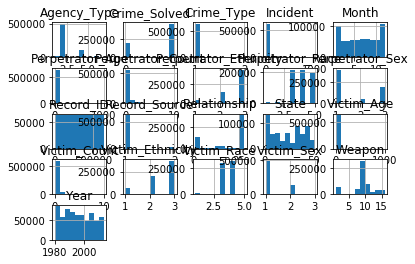

In [13]:
df.hist()
pl.show()

In [4]:
dummy_ranks = pd.get_dummies(df['Victim_Race'], prefix = 'Victim_Race')
print dummy_ranks.head()
dummy_ranks

   Victim_Race_1  Victim_Race_2  Victim_Race_3  Victim_Race_4  Victim_Race_5
0              0              1              0              0              0
1              0              0              0              1              0
2              0              1              0              0              0
3              0              0              0              1              0
4              0              1              0              0              0


,Victim_Race_1,Victim_Race_2,Victim_Race_3,Victim_Race_4,Victim_Race_5
0,0,1,0,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0
5,0,0,0,1,0
6,0,1,0,0,0
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


In [6]:
cols_to_keep = ['Crime_Solved','Victim_Age', "Victim_Sex"]
data = df[cols_to_keep].join(dummy_ranks.ix[:,'Victim_Race':])
print data.head()                              

data['intercept']=1.0

   Crime_Solved  Victim_Age  Victim_Sex  Victim_Race_1  Victim_Race_2  \
0             1          14           1              0              1   
1             1          43           1              0              0   
2             0          30           2              0              1   
3             1          43           1              0              0   
4             0          30           2              0              1   

   Victim_Race_3  Victim_Race_4  Victim_Race_5  
0              0              0              0  
1              0              1              0  
2              0              0              0  
3              0              1              0  
4              0              0              0  


In [13]:
df.columns

Index([u'Record_ID', u'Agency_Name', u'Agency_Type', u'City', u'State',
       u'Year', u'Month', u'Incident', u'Crime_Type', u'Crime_Solved',
       u'Victim_Sex', u'Victim_Age', u'Victim_Race', u'Victim_Ethnicity',
       u'Perpetrator_Sex', u'Perpetrator_Age', u'Perpetrator_Race',
       u'Perpetrator_Ethnicity', u'Relationship', u'Weapon', u'Victim_Count',
       u'Perpetrator_Count', u'Record_Source'],
      dtype='object')

In [23]:
#victim_cols = data.columns[1:]
result = sm.Logit.from_formula('Crime_Solved ~ Victim_Age + C(Victim_Sex) + C(Victim_Race)-1 ',data = df).fit()
#result = logit.fit()
print result.summary()
# intercept, victim_sex[3]번 구현.

Optimization terminated successfully.
         Current function value: 0.601756
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           Crime_Solved   No. Observations:               638454
Model:                          Logit   Df Residuals:                   638446
Method:                           MLE   Df Model:                            7
Date:                Thu, 13 Apr 2017   Pseudo R-squ.:                 0.01220
Time:                        20:33:04   Log-Likelihood:            -3.8419e+05
converged:                       True   LL-Null:                   -3.8894e+05
                                        LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
C(Victim_Sex)[1]        0.8271      0.022     36.913      0.000         0.783     0.871
C(